In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
recentdate = session.query(func.max(Measurement.date)).all()
recentdate

[('2017-08-23',)]

2016-08-23 00:00:00
Query Date: 2016-08-23


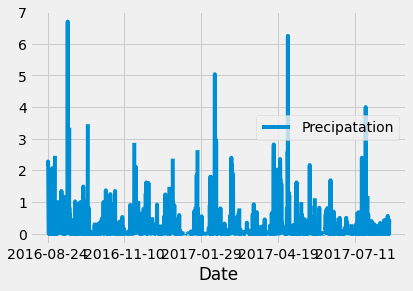

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

oneyear_ago = dt.datetime(2017,8,23) - dt.timedelta(days = 365)
print(oneyear_ago)

# Perform a query to retrieve the date and precipitation scores
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print ("Query Date:", query_date)

Prep = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

PrepDF = pd.DataFrame(Prep, columns =['Date','Precipatation'])
PrepDF.set_index('Date', inplace=True)
PrepDF


# # Sort the dataframe by date
PrepDF = PrepDF.sort_index()
PrepDF

# # Use Pandas Plotting with Matplotlib to plot the data

PrepDF.plot()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data



PrepDF.describe()

,Precipatation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(func.count(Station.station)).all()
station_number



[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

avg = session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').order_by(func.count(Measurement.station).desc()).all()
avg

min = avgstations = session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').order_by(func.count(Measurement.station).desc()).all()
min

max = avgstations = session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').order_by(func.count(Measurement.station).desc()).all()
max




[('USC00519281', 85.0)]

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


Mostactive = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > query_date).filter(Measurement.station=='USC00519281').all()
Mostactive

Results = [ {"Date": result[0], "Temp" : result [1] } for result in Mostactive]
Results


MostactiveDF = pd.DataFrame(Results)

MostactiveDF.set_index("Date", inplace=True)

MostactiveDF.head()

,Temp
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


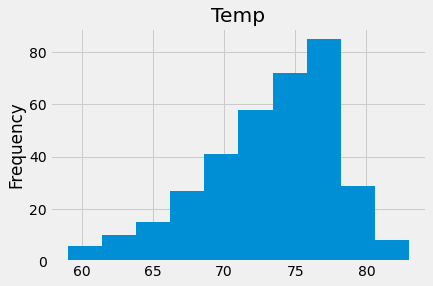

In [78]:
MostactiveDF.hist()
plt.ylabel("Frequency")
plt.show()

# Close Session

In [79]:
session.close()